<a href="https://colab.research.google.com/github/AlexanderSlokov/aiClassPracticeAssignments/blob/main/FuzzyCtrlEx5_2ControllingDynamicsOfServomotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install scikit-fuzzy

import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
#add control about POSITION ERROR and ROTOR VELOCITY
posEr = ctrl.Antecedent(np.arange(-1.6,1.6,0.1),'posEr')
rotorVeloc = ctrl.Antecedent(np.arange(-0.6,0.6,0.1),'rotorVeloc')

In [20]:
#output is the MOTOR VOLTAGE
volt = ctrl.Consequent(np.arange(-6,5,0.1),'volt')

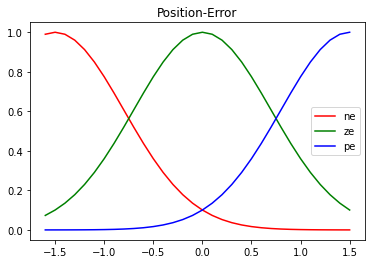

In [21]:
#create graph for POSITION-ERROR
posEr['ne'] = fuzz.gaussmf(posEr.universe, -1.5, 0.7)
posEr['ze'] = fuzz.gaussmf(posEr.universe, 0, 0.7)
posEr['pe'] = fuzz.gaussmf(posEr.universe, 1.5, 0.7)

# Plot the fuzzy sets 
fig, ax = plt.subplots()

ax.plot(posEr.universe, fuzz.gaussmf(posEr.universe,-1.5, 0.7), 'r', linewidth=1.5, label='ne')
ax.plot(posEr.universe, fuzz.gaussmf(posEr.universe, 0, 0.7), 'g', linewidth=1.5, label='ze')
ax.plot(posEr.universe, fuzz.gaussmf(posEr.universe, 1.5, 0.7), 'b', linewidth=1.5, label='pe')

ax.set_title('Position-Error')
ax.legend()

# Display the plot
plt.show()

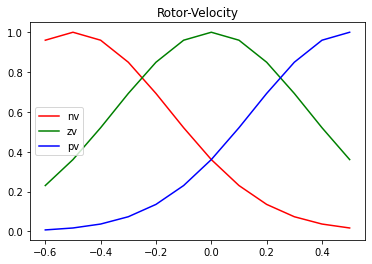

In [22]:
#create graph for ROTOR-VELOCITY
rotorVeloc['nv'] = fuzz.gaussmf(rotorVeloc.universe, -0.5, 0.35)
rotorVeloc['zv'] = fuzz.gaussmf(rotorVeloc.universe, 0, 0.35)
rotorVeloc['pv'] = fuzz.gaussmf(rotorVeloc.universe, 0.5, 0.35)

# Plot the fuzzy sets 
fig, ax = plt.subplots()

ax.plot(rotorVeloc.universe, fuzz.gaussmf(rotorVeloc.universe,-0.5, 0.35), 'r', linewidth=1.5, label='nv')
ax.plot(rotorVeloc.universe, fuzz.gaussmf(rotorVeloc.universe, 0, 0.35), 'g', linewidth=1.5, label='zv')
ax.plot(rotorVeloc.universe, fuzz.gaussmf(rotorVeloc.universe, 0.5, 0.35), 'b', linewidth=1.5, label='pv')

ax.set_title('Rotor-Velocity')
ax.legend()

# Display the plot
plt.show()

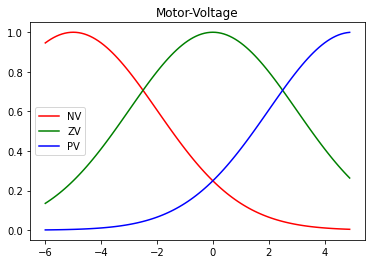

In [23]:
#create graph for MOTOR-VOLTAGE
volt['NV'] = fuzz.gaussmf(volt.universe, -5, 3)
volt['ZV'] = fuzz.gaussmf(volt.universe, 0, 3)
volt['PV'] = fuzz.gaussmf(volt.universe, 5, 3)

# Plot the fuzzy sets 
fig, ax = plt.subplots()

ax.plot(volt.universe, fuzz.gaussmf(volt.universe,-5, 3), 'r', linewidth=1.5, label='NV')
ax.plot(volt.universe, fuzz.gaussmf(volt.universe, 0, 3), 'g', linewidth=1.5, label='ZV')
ax.plot(volt.universe, fuzz.gaussmf(volt.universe, 5, 3), 'b', linewidth=1.5, label='PV')

ax.set_title('Motor-Voltage')
ax.legend()

# Display the plot
plt.show()

In [25]:
#set rules for controller
rule1=ctrl.Rule(posEr['ne']&rotorVeloc['nv'],volt['NV'])
rule2=ctrl.Rule(posEr['ne']&rotorVeloc['zv'],volt['NV'])
rule3=ctrl.Rule(posEr['ne']&rotorVeloc['pv'],volt['NV'])

rule4=ctrl.Rule(posEr['ze']&rotorVeloc['nv'],volt['NV'])
rule5=ctrl.Rule(posEr['ze']&rotorVeloc['zv'],volt['ZV'])
rule6=ctrl.Rule(posEr['ze']&rotorVeloc['pv'],volt['PV'])

rule7=ctrl.Rule(posEr['pe']&rotorVeloc['nv'],volt['PV'])
rule8=ctrl.Rule(posEr['pe']&rotorVeloc['zv'],volt['PV'])
rule9=ctrl.Rule(posEr['pe']&rotorVeloc['pv'],volt['PV'])


In [26]:
#begin training, how many rules much tell
operating_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
operating = ctrl.ControlSystemSimulation(operating_control)

In [38]:
#input for testing
operating.input['posEr'] = -1
operating.input['rotorVeloc'] = -0.3

-1.5988939365597126


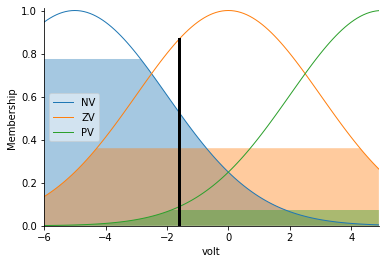

In [42]:
#according from testing values, a negative motor voltage expected
operating.compute()
print(operating.output['volt'])
volt.view(sim=operating)